<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from _paths import nomeroff_net_dir

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip


In [2]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading",
                                              path_to_model="modelhub://yolov5_brand_np",
                                              image_loader="opencv")

YOLOv5 🚀 v6.1-168-g5743deb torch 1.9.0+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/brand_np/1265135.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example2.jpeg'),
])

/mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:125: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))
/mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/pipes/number_plate_text_readers/text_detector.py:81: UserWarning: Label 'military_ua' not in dict_keys(['eu_ua_2015', 'eu_ua_2004', 'eu_ua_1995', 'eu', 'xx_transit', 'xx_unknown', 'ru', 'eu_ua_ordlo_lpr', 'eu_ua_ordlo_dpr', 'kz', 'kg', 'ge', 'su', 'am', 'by'])! Label changed on default 'eu_ua_2015'.
  warnings.warn(f"Label '{label}' not in {self.detectors_

In [4]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

[[     476.74      688.15      757.55      753.68     0.92377           1]]


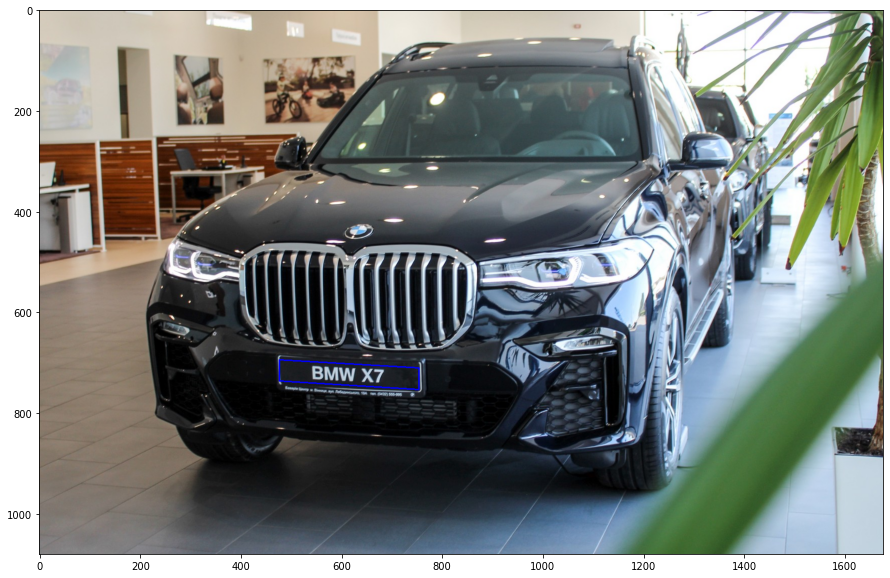

[[     845.29      378.66      946.19      404.33     0.89128           0]
 [     427.58      378.94       527.4      401.52     0.86037           0]]


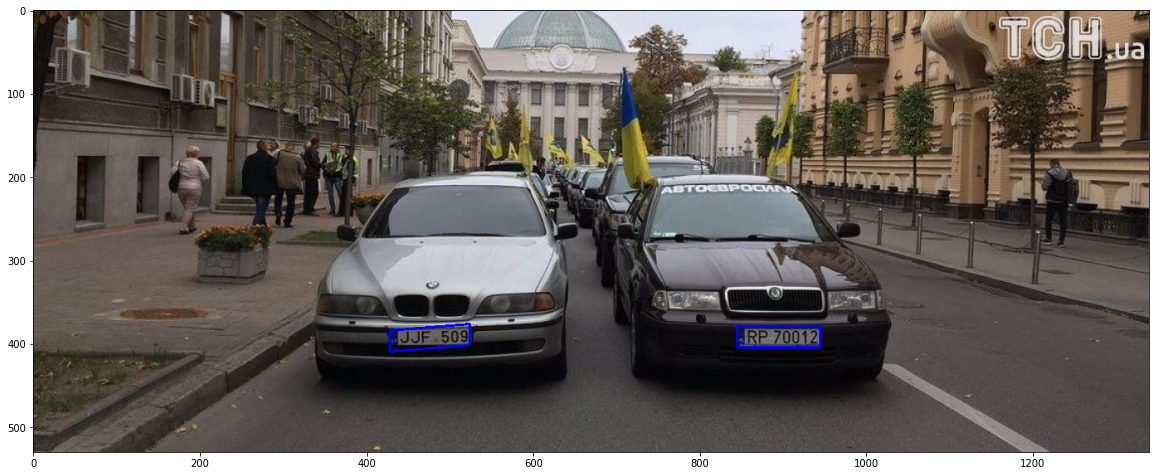

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, image_points, image_bboxs in zip(images, images_points, images_bboxs):
    # 1 - brand_numberplate 0 -numberplate
    print(image_bboxs)
    img = img.astype(np.uint8)
    for cntr in image_points:
        cntr = np.array(cntr, dtype=np.int32)
        cv2.drawContours(img, [cntr], -1, (0, 0, 255), 2)
    plt.imshow(img)
    plt.show()